<a href="https://colab.research.google.com/github/fash098/Airbnb-Booking-Analysis/blob/main/EDA_Project_Airbnb_Booking_Analysis_Fathima_Shanavas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA (Exploratory Data Analysis)
##### **Contribution**    - Individual/Team


# **Project Summary -**

Since 2008, Airbnb has facilitated a novel and personalized approach to travel for both guests and hosts, which has resulted in its recognition as a one-of-a-kind service worldwide. The company places great importance on data analysis, particularly when it comes to the millions of listings available on its platform. These listings generate an immense amount of data, which can be used to enhance security, make informed business decisions, gain insight into customer and host behavior and performance, and guide marketing efforts, as well as implement innovative additional services. The dataset in question comprises approximately 49,000 observations, with a mix of categorical and numerical values across 16 columns.

Our aim is to explore and analyze the data to discover key understandings (not limited to these) such as :


1) What are the most popular cities for Airbnb bookings?

2) Are there any geographic patterns in Airbnb bookings (e.g. certain neighborhoods or areas that are more popular)?

3) What types of properties (e.g. apartments, houses, private rooms) are most popular among Airbnb guests?

4) Who are some of the best hosts and some insights about their listings?

5) What is the average length of stay for Airbnb guests?

6) Which is the most expensive location? How does price range differ for different locations?


# **GitHub Link -**

https://github.com/fash098/Airbnb-Booking-Analysis/tree/main

# **Problem Statement**


Pricing Optimization: To understand pricing factors, trends, and demand patterns to optimize listing prices, maximize revenue, and stay competitive.

Revenue Management: Businesses can adjust pricing strategies, optimize inventory allocation, and effectively manage revenue based on booking patterns and demand fluctuations.

Customer Segmentation: To identify customer segments based on demographics, preferences, and booking behavior. This supports targeted marketing, personalized recommendations, and improved customer satisfaction and loyalty.

Property Investment Decisions: Provides valuable insights for property investors regarding profitable opportunities, property acquisition, pricing, and rental management based on factors like location, property type, and amenities.

Market Expansion: To identify untapped markets and areas with high demand by examining booking patterns and customer reviews.

#### **Define Your Business Objective?**

Our objective is to optimize pricing, maximize revenue, and enhance customer satisfaction through data-driven insights from Airbnb booking dataset.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
path_file =('/content/drive/MyDrive/AlmaBetter/Capstone_Project/Airbnb_NYC_2019.csv')
airbnb_df = pd.read_csv(path_file)

### Dataset First View

In [4]:
# Dataset First Look
airbnb_df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

There are 48895 rows and 16 columns in this dataset

### Dataset Information

In [6]:
# Dataset Info
airbnb_df.info


<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(airbnb_df[airbnb_df.duplicated()])

0

There are no duplicate values in this dataset

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(airbnb_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

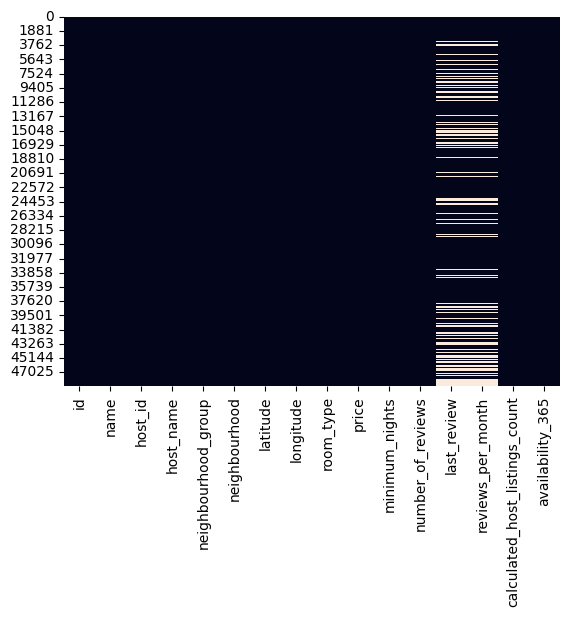

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(airbnb_df.isnull(), cbar=False)

last_review and reviews_per_month has reasonably high null values.

### What did you know about your dataset?

The dataset provided pertains to the booking details of Airbnb for the year 2019 and serves as the foundation for deriving valuable insights to enhance stakeholders' business operations. The dataset comprises 48,895 rows and 16 columns, demonstrating a comprehensive representation of the data. Notably, the dataset exhibits zero instances of duplicate entries, ensuring data integrity. However, it is worth noting that certain columns, specifically 'last_reviews' and 'reviews per month', contain a significant number of missing values. Rest assured, addressing and resolving these missing values will be an integral part of our ongoing project, guaranteeing the reliability and completeness of our analysis.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
airbnb_df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


### Variables Description

The average minimum number of nights for bookings is 7.029.

The lowest recorded minimum nights for bookings is 1.

An unusually high maximum value of 1250 for minimum nights is observed, indicating a potential anomaly.

The minimum price charged for bookings is 0, which is not a reasonable value.

The average price for bookings is $152.72.

The highest recorded price for bookings is $10,000.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for column in airbnb_df.columns.tolist():
    unique_count = airbnb_df[column].nunique()
    print("The number of unique values in", column, "is", unique_count)

The number of unique values in id is 48895
The number of unique values in name is 47905
The number of unique values in host_id is 37457
The number of unique values in host_name is 11452
The number of unique values in neighbourhood_group is 5
The number of unique values in neighbourhood is 221
The number of unique values in latitude is 19048
The number of unique values in longitude is 14718
The number of unique values in room_type is 3
The number of unique values in price is 674
The number of unique values in minimum_nights is 109
The number of unique values in number_of_reviews is 394
The number of unique values in last_review is 1764
The number of unique values in reviews_per_month is 937
The number of unique values in calculated_host_listings_count is 47
The number of unique values in availability_365 is 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
#Preparing the dataset for wrangling
# Creating a copy of the dataset
df = airbnb_df.copy()


In [14]:
#Checking for null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
#Handling missing values by adding zero to it.
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'last_review':0},inplace=True)
df.fillna({'name':0},inplace=True)
df.fillna({'host_name':0},inplace=True)

In [16]:
df.isnull().sum()

#missing values successfully filled.

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
#Checking for the datatypes of each column
df.dtypes

#Need not change any datatype for now

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [18]:
#It was observed that the minimum price of booking is 0 which must have been an error. So let's clean that value and choose only price above 0.

df = df[df['price'] > 0]
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
# Performing some aggregate functions for obtaining better insights about the data
#Airbnb booking trend with respect to property type
df_property_types = df['room_type'].value_counts()
print(df_property_types)

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64


In [20]:
# Airbnb booking trend with respect to neighbourhood
df_area = df["neighbourhood_group"].value_counts()
print(df_area)

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [21]:
#Price per neighbourhood_group according to different room types.
price_per_group = df.groupby(['neighbourhood_group','room_type'])['price'].sum().sort_values(ascending=False).reset_index()
print(price_per_group)

   neighbourhood_group        room_type    price
0            Manhattan  Entire home/apt  3289707
1             Brooklyn  Entire home/apt  1704633
2            Manhattan     Private room   932111
3             Brooklyn     Private room   775099
4               Queens  Entire home/apt   308218
5               Queens     Private room   241983
6                Bronx  Entire home/apt    48325
7                Bronx     Private room    43546
8            Manhattan      Shared room    42709
9        Staten Island  Entire home/apt    30597
10            Brooklyn      Shared room    20868
11              Queens      Shared room    13666
12       Staten Island     Private room    11711
13               Bronx      Shared room     3588
14       Staten Island      Shared room      517


In [22]:
#An overall picture about property preferences
property_preference=df.groupby(['latitude','longitude','name','host_id',"neighbourhood_group",'neighbourhood', 'room_type'])['number_of_reviews'].sum().sort_values(ascending=False).nlargest(n=10).reset_index()
print(property_preference)

   latitude  longitude                                               name  \
0  40.66730  -73.76831                            Room near JFK Queen Bed   
1  40.82085  -73.94025                         Great Bedroom in Manhattan   
2  40.82124  -73.93838                     Beautiful Bedroom in Manhattan   
3  40.82264  -73.94041                       Private Bedroom in Manhattan   
4  40.66939  -73.76975                            Room Near JFK Twin Beds   
5  40.77006  -73.87683                  Steps away from Laguardia airport   
6  40.71921  -73.99116           Manhattan Lux Loft.Like.Love.Lots.Look !   
7  40.76335  -73.87007  Cozy Room Family Home LGA Airport NO CLEANING FEE   
8  40.67926  -73.97711                 Private brownstone studio Brooklyn   
9  40.70283  -73.92131                    LG Private Room/Family Friendly   

    host_id neighbourhood_group    neighbourhood        room_type  \
0  47621202              Queens          Jamaica     Private room   
1   4734398   

In [23]:
#Most revenue yielding neighbourhoods and respective neighbourhood groups.
revenue_yeilding_neighbourhoods=df.groupby(["neighbourhood_group",'neighbourhood', 'room_type'])['price'].sum().sort_values(ascending=False).nlargest(n=10).reset_index()
print(revenue_yeilding_neighbourhoods)

  neighbourhood_group       neighbourhood        room_type   price
0            Brooklyn        Williamsburg  Entire home/apt  389724
1           Manhattan             Midtown  Entire home/apt  331395
2           Manhattan     Upper West Side  Entire home/apt  329129
3           Manhattan      Hell's Kitchen  Entire home/apt  301786
4           Manhattan     Upper East Side  Entire home/apt  284150
5           Manhattan        East Village  Entire home/apt  264778
6            Brooklyn  Bedford-Stuyvesant  Entire home/apt  246256
7           Manhattan             Chelsea  Entire home/apt  232275
8           Manhattan              Harlem  Entire home/apt  183989
9           Manhattan        West Village  Entire home/apt  182007


In [24]:
# Understanding hosts with maximum listings.
maximum_listings=df['host_id'].value_counts().head(10)
print(maximum_listings)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64


In [25]:
# Understanding top hosts.
top_hosts=df.groupby(["host_id"])['reviews_per_month'].sum().sort_values(ascending=False).nlargest(n=10).reset_index()
print(top_hosts)

     host_id  reviews_per_month
0  219517861             397.56
1  244361589             111.72
2  232251881              80.63
3   26432133              68.02
4  137274917              62.89
5  224414117              59.10
6  156948703              56.44
7     344035              56.00
8  156684502              54.38
9   37312959              53.53


### What all manipulations have you done and insights you found?

All the manipulations done are on the copy of the dataset keeping the original dataset intact.

1) First step was to look out for null values and filling those voids. The approach we adopted here was replacing nulls with 0.

2) While we used describe method on the data some anomalies were observed. One most important anomaly among them was minimum price. Minimum price was shown 0. Infact there were many rows with 0 as the per night booking price. This must have occured as an error while updating the data and such rows are not useful for the study. So we removed such rows from the study.

3) Next few steps were to understand the data deeper. It was understood that the data was about the Airbnb booking data of New York in the year 2019. This data is spead across the 5 boroughs of New York :

    a) Manhattan
    b) Brooklyn
    c) Queens
    d) Bronx
    e) Staten Island

In these 5 neighbourhood groups Airbnb stays are of 3 types

    a) Entire home/apartment
    b) Private room
    c) Shared room

4) Later we performed some group by functions to get a broader idea about some of the best locations and room types that brings in maximum revenue and by how much. We also delved deeper into property preferences. We understood that the room type that brings in maximum revenue is actually private rooms among which

    1) Jamaica of Queens,
    2) Harlem of Manhattan and
    3) East Elmhurst of Queens
   
are the most popular neighbourhoods.

5) Finally we got a good picture on the hosts with maximum listings as well as top performing hosts. Host with host_id '219517861' is the best host with the highest number of properties.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 | Bar Chart on Property Types

Text(0, 0.5, 'Number of bookings ')

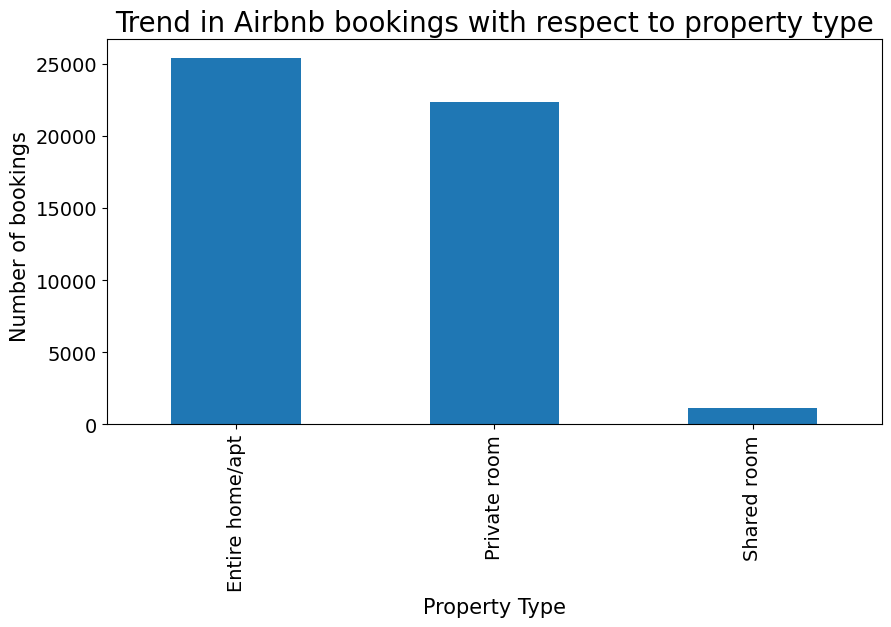

In [26]:
# Chart - 1 visualization code
ax = df_property_types.plot.bar(figsize = (10,5),fontsize = 14)
# Set the title
ax.set_title("Trend in Airbnb bookings with respect to property type", fontsize = 20)
# Set x and y-labels
ax.set_xlabel("Property Type", fontsize = 15)
ax.set_ylabel("Number of bookings ", fontsize = 15)


##### 1. Why did you pick the specific chart?

A bar chart plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values. To understand the trend between bookings and property type, bar chart seemed like the best possible visualization.



##### 2. What is/are the insight(s) found from the chart?

Shared rooms are the least popular type of lodging for Airbnb customers, whereas more people prefer to rent out entire apartments or homes closely followed by private rooms


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is suggested to increase availability of entire apartments/homes as well as private rooms to boost the profits.

#### Chart - 2 | Pie Chart on Neighbourhood Groups



Text(0.5, 1.0, 'Trend in Airbnb bookings with respect to neighbourhood groups')

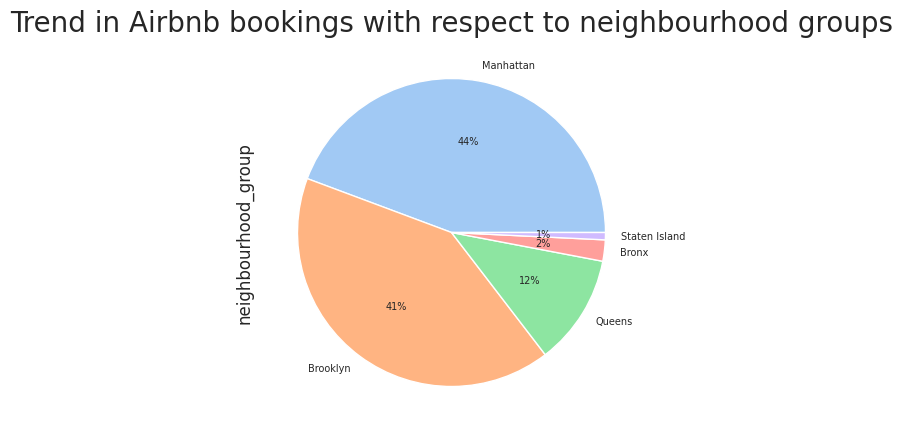

In [27]:
# Chart - 2 visualization code
sns.set_theme(palette='pastel',font_scale=1)
ax = df_area.plot.pie(figsize = (10,5),fontsize = 7, autopct='%.0f%%')
#Set the title
ax.set_title("Trend in Airbnb bookings with respect to neighbourhood groups", fontsize = 20)


##### 1. Why did you pick the specific chart?

A data's part-to-whole relationship is illustrated with a pie chart. The area covered in a circle with various colours makes it simple to illustrate how the percentages compare. When comparing different percentages, pie charts are widely utilised. I thus developed a pie chart, which enabled me to compare the percentage of bookings with repect to different neighbourbood groups.

##### 2. What is/are the insight(s) found from the chart?

It is observed that 44% of the guests book Airbnbs in Manhattan which is closely followed by Brooklyn with 41%. Queens hosts only 12% of guests. Bronx and Staten island hosts the least number of guests with a meagre 2 and 1 percent of guests respectively

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Most guests travel to Manhattan and Brooklyn. Queens also hosts guests of significant proportion. Listings could be increased in these locations.
- It is assumed that Bronx and Staten Island has their geographical disadvantages due to which guests are less. More research could be done on Bronx and Staten Island.

#### Chart - 3 | Stacked Bar Chart on Revenue Per Borough and the Specific Room Types

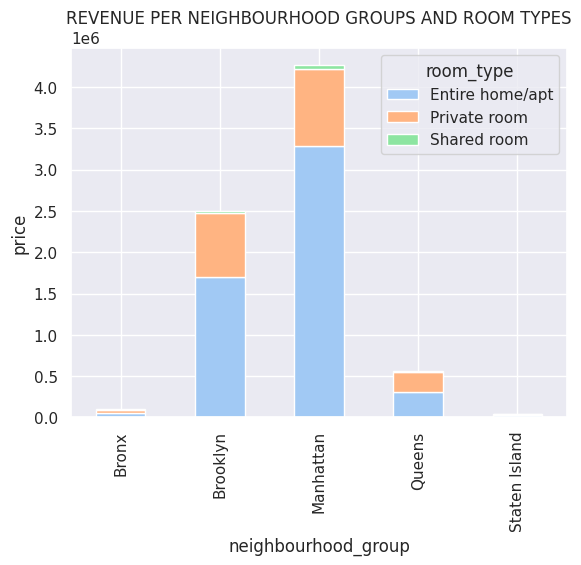

In [28]:
# Chart - 3 visualization code
ax = (df.pivot_table(index='neighbourhood_group', columns='room_type', values='price', aggfunc='sum'))
ax.plot(kind='bar', stacked=True)
#Set Title
plt.title('REVENUE PER NEIGHBOURHOOD GROUPS AND ROOM TYPES')
#Set y label
plt.ylabel('price')
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar chart extends the standard bar chart from looking at numeric values across one categorical variable to two. Each bar in a standard bar chart is divided into a number of sub-bars stacked end to end, each one corresponding to a level of the second categorical variable. We are clearly able to visualize how the revenue distribution is among different room types for each neighbouring groups.



##### 2. What is/are the insight(s) found from the chart?

- In Manhattan and Brooklyn almost 75% of guests prefer entire home/apartment. Almost 20-23 percent prefer private room and a meagre 1-2% opt for shared rooms.

- In Queens the trend is different. Entire home/apartment and shared rooms are preferred almost equally with a very small percent opting for shared rooms.

- In Bronx and Staten Island airbnb presence itself is very limited. Entire home/apartment and private rooms are preffered over shared rooms.

- In a nutshell Entire home/apartments are most preferred and shared rooms are least preffered irrespective of locations based on boroughs.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Again, Entire apartment/homes and Private rooms are most preferred. It is assumed that shared rooms are only preferred when people are travelling on high budget.
If we want to boost sales for shared spaces, introducing fun and aesthetic listings under shared rooms could be helpful.

#### Chart - 4 | Bar Chart on Most Revenue Yielding Neighbourhoods



  neighbourhood_group       neighbourhood        room_type   price
0            Brooklyn        Williamsburg  Entire home/apt  389724
1           Manhattan             Midtown  Entire home/apt  331395
2           Manhattan     Upper West Side  Entire home/apt  329129
3           Manhattan      Hell's Kitchen  Entire home/apt  301786
4           Manhattan     Upper East Side  Entire home/apt  284150
5           Manhattan        East Village  Entire home/apt  264778
6            Brooklyn  Bedford-Stuyvesant  Entire home/apt  246256
7           Manhattan             Chelsea  Entire home/apt  232275
8           Manhattan              Harlem  Entire home/apt  183989
9           Manhattan        West Village  Entire home/apt  182007


Text(0, 0.5, 'price')

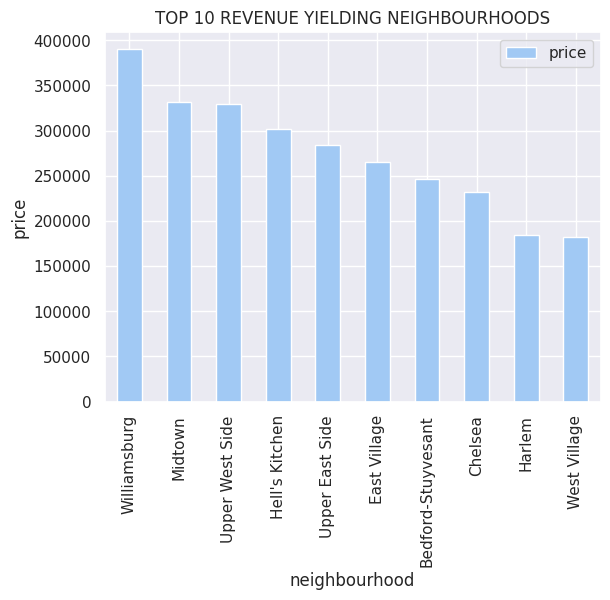

In [29]:
# Chart - 4 visualization code
# Most revenue yielding neighbourhoods
sns.set_theme(palette='pastel',font_scale=1)
print(revenue_yeilding_neighbourhoods)
df_area = revenue_yeilding_neighbourhoods
df_area.plot(kind='bar', x='neighbourhood', y='price')
plt.title('TOP 10 REVENUE YIELDING NEIGHBOURHOODS')
plt.ylabel('price')

##### 1. Why did you pick the specific chart?

Bar charts though one of the most basic visualization method, is most preferred for this study as it clearly depicts revenue distribution among the top 10 neighbourhoods.

##### 2. What is/are the insight(s) found from the chart?

Top 3 revenue yeilding neighbourhoods are :    
     a) Williamsburg in Brooklyn,
     b) Midtown in Manhattan,
     c) Upperwest side in Manhattan.

It's also observed that in top 10 listings, 8 are from Manhattan and 2 are from Brooklyn.    


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- When we looked at booking trends, both Manhattan and Brooklyn had comparably similar booking rates.
- However there is a considerable disparity among the revenue bought as well as the top performing listings when we compare these boroughs. This could be because of the overall charm of the listings, pricings, amenities, reviews, etc.

#### Chart - 5 | Bar Chart on Top Hosts

Text(0, 0.5, 'reviews_per_month')

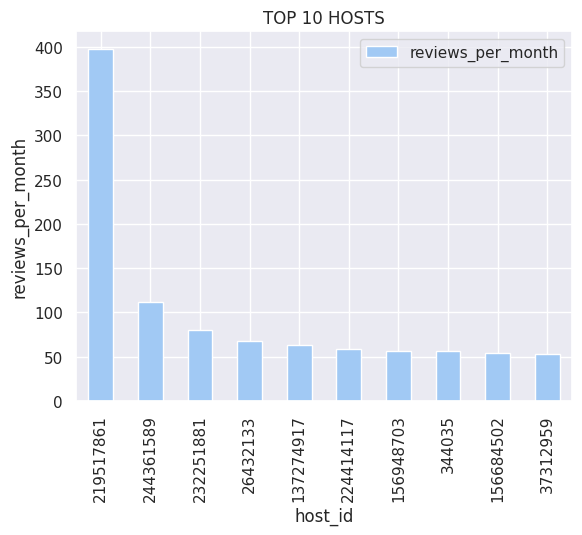

In [30]:
top_hosts=df.groupby(["host_id"])['reviews_per_month'].sum().sort_values(ascending=False).nlargest(n=10).reset_index()
top_hosts.plot(kind='bar', x='host_id', y='reviews_per_month')
#Setting title and y label.
plt.title('TOP 10 HOSTS')
plt.ylabel('reviews_per_month')



##### 1. Why did you pick the specific chart?

Bar char gives the best representation for host_id versus reviews per month.

##### 2. What is/are the insight(s) found from the chart?

- Host with Host ID '219517861' is the best host with most number of reviews and properties.
- There is a large disparity between host '219517861' and other hosts. This could be because of the best quality, service, aminities that the host is providing which is standing out from the other hosts.
- It is also to be noted that this host has maximum number of properties. It is also possible that there are other hosts who are providing equally best properties but due to lesser number of listings we have not uncovered them.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Multiple hosts with a huge number of listings are not getting enough guests. This needs to be checked.

#### Chart - 6 | Joint Plot on Host ID And Reviews

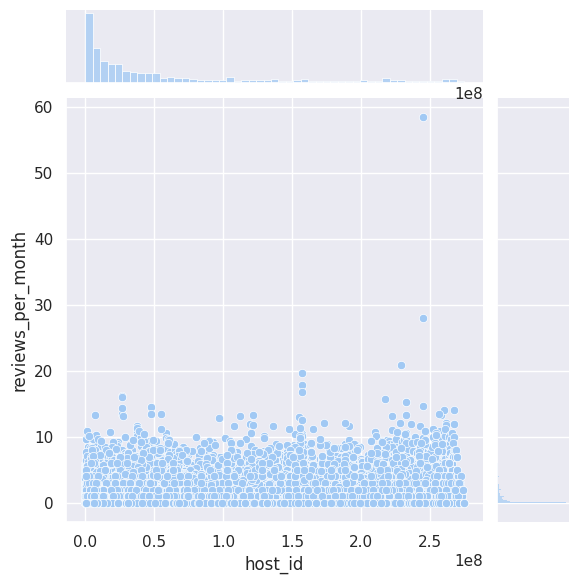

In [31]:
# Chart - 6 visualization code
#Jointplot to evaluate correlation between host_id and reviews.
sns.jointplot(x='host_id', y='reviews_per_month', data=df)


##### 1. Why did you pick the specific chart?

The joint plot is a way of understanding the relationship between two variables and the distribution of individuals of each variable. The joint plot mainly consists of three separate plots in which, one of it was the middle figure that is used to see the relationship between x and y. Here we are trying to understand the relationship between host_id and reviews_per_month

##### 2. What is/are the insight(s) found from the chart?

We are understanding that there is a positive correlation between host_id and reviews_per_month

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Addressing the performance of hosts with numerous listings but low guest engagement could potentially improve overall host performance.

#### Chart - 7 | Box Plot on Price Per Neighbourhood Groups

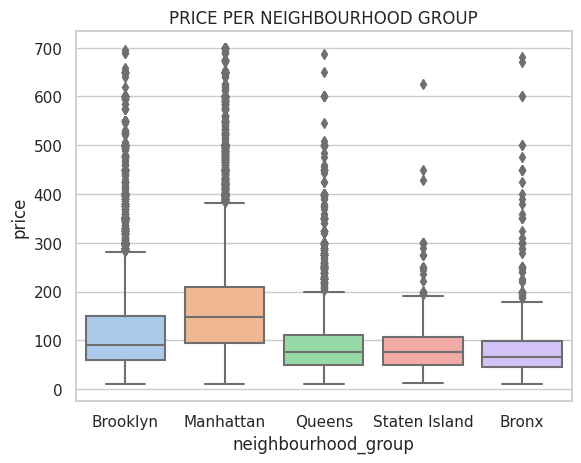

In [32]:
# Chart - 7 visualization code
sns.set_style("whitegrid")
price_distribution = df[df.price <700]
plt.title("PRICE PER NEIGHBOURHOOD GROUP")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_distribution)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot uses boxes and lines to depict the distributions of one or more groups of numeric data. Box limits indicate the range of the central 50% of the data, with a central line marking the median value. Lines extend from each box to capture the range of the remaining data, with dots placed past the line edges to indicate outliers.

##### 2. What is/are the insight(s) found from the chart?

- Manhattan seems to have the highest price range for the listings followed by Brooklyn
- Queens and Staten Island very similar type of distribution with Queens leading by a conspicous difference
- Listings in Bronx evidently are the cheapest accomodation options.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Correlation Heatmap

<ipython-input-33-9fe028f2bba2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

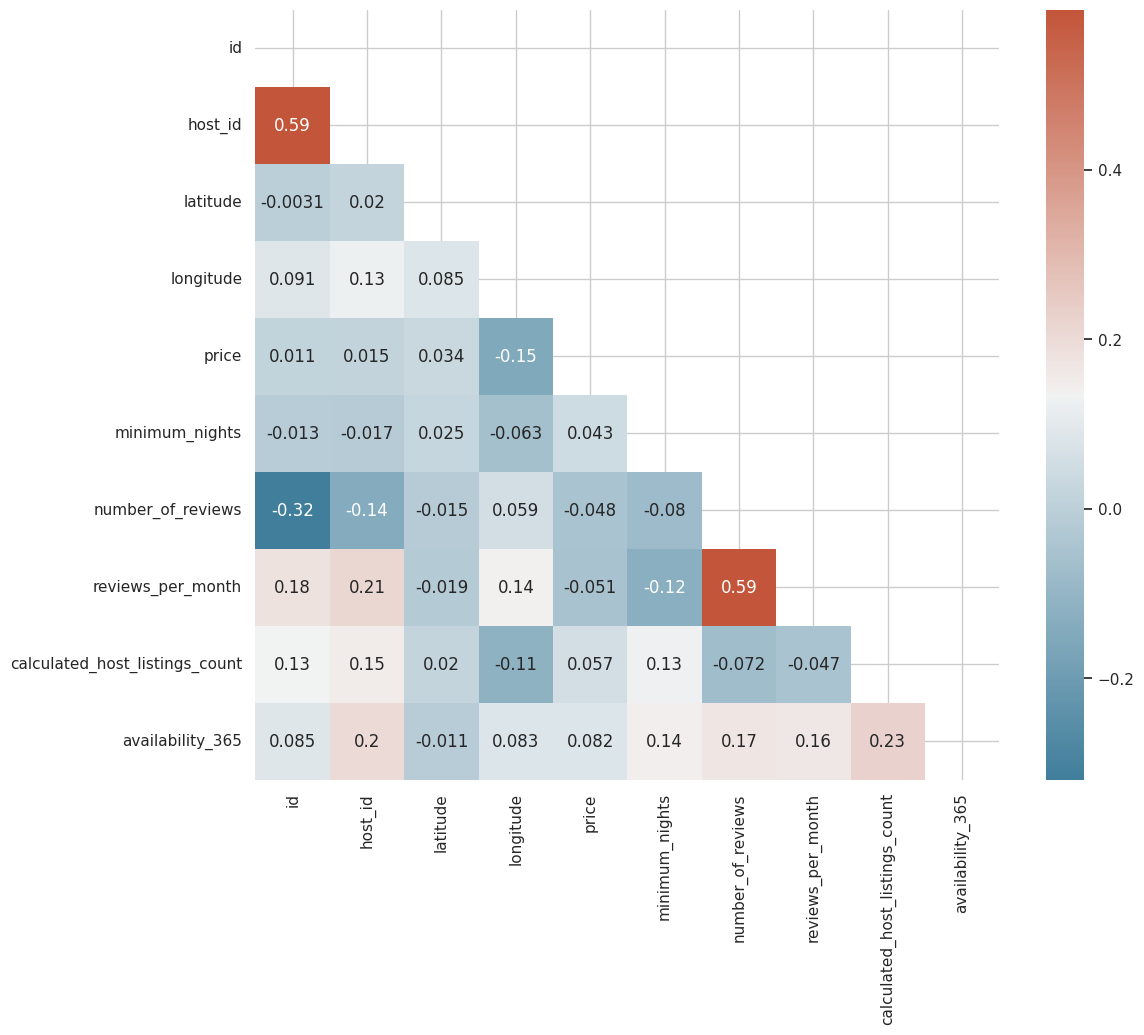

In [33]:
# Correlation between different variables

corr = df.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.
We used correlation heatmap here to check if some variables have any direct correlation with other variables.


##### 2. What is/are the insight(s) found from the chart?

- Reviwes per month and Number of reviews are highly correlated as expected.
- Host ID has some correlation with 3 other variables such as

    1) Availability
    2) Listings
    3) Availability through 365 days.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the observations made during the exploratory data analysis of the Airbnb booking dataset, here are some suggestions to achieve the business objectives of optimizing pricing, maximizing revenue, and enhancing customer satisfaction:

- **Room Type Optimization:**

 Private rooms are the most revenue-generating room type, especially in popular neighborhoods like Jamaica (Queens), Harlem (Manhattan), and East Elmhurst (Queens).
 To optimize pricing and maximize revenue, consider offering more private rooms in these popular neighborhoods.
 However, don't neglect the demand for entire apartments/homes as they also contribute significantly to revenue.


- **Geographical Focus:**

 Manhattan and Brooklyn are the most popular boroughs among guests, with Queens also hosting a significant number of guests.
 Consider increasing the number of listings in Manhattan and Brooklyn to further cater to guest demand.
 While Bronx and Staten Island have lower guest numbers, it might be worth conducting further research to understand any geographical disadvantages that could be impacting demand in these areas.

- **Room Type Preference by Borough:**

 Guests overwhelmingly prefer entire home/apartment rentals in Manhattan and Brooklyn, with private rooms also being popular.
 In Queens, there's a more balanced preference between entire home/apartment and shared rooms.
 In Bronx and Staten Island, prioritize offering entire home/apartment and private room options over shared rooms.
 Consider adjusting the listing distribution in each borough to align with these preferences.

- **Top Revenue-Generating Neighborhoods:**

 Focus on neighborhoods like Williamsburg (Brooklyn), Midtown (Manhattan), and Upper West Side (Manhattan) for higher revenue.
 Since most of the top revenue-yielding neighborhoods are in Manhattan, ensure that listings in these neighborhoods are well-maintained, competitively priced, and offer exceptional amenities.

- **Host Performance and Listings:**

 Investigate why the host with Host ID '219517861' is outperforming others significantly. Analyze their properties, services, and amenities to identify best practices.
 Address the imbalance between hosts with a large number of listings and their actual booking rates. Some hosts might need assistance to improve their listings' visibility and attractiveness.

- **Pricing Strategy:**

 Review the pricing strategy for listings in different boroughs. For instance, since Manhattan and Brooklyn have higher price ranges, ensure that the prices are justified by the quality of accommodations and services.
 Consider introducing competitive pricing for listings in Bronx and Staten Island to attract more budget-conscious travelers.

- **Correlation Insights:**

 High correlation between reviews per month and the number of reviews suggests that actively reviewed properties tend to have more bookings.
 Host ID's correlation with availability, listings, and availability through 365 days could indicate that certain hosts are more consistent in managing and maintaining their properties.

- **Negative Growth Considerations:**

 Shared rooms are less popular and generate less revenue compared to entire apartments/homes or private rooms. While you might want to continue offering shared rooms for budget travelers, the focus should be on increasing the availability and quality of entire apartments/homes and private rooms.

- **Enhancing Guest Experience:**

 Collect guest feedback and reviews to identify areas of improvement. Address any recurring issues or concerns raised by guests to enhance overall satisfaction.
 Consider providing unique and aesthetically pleasing shared room options to attract more guests to this category.

- **Marketing and Promotion:**

 Use data insights to inform marketing strategies. Promote listings in popular neighborhoods and boroughs to attract more bookings.
 Highlight unique features and amenities of listings to stand out from competitors.

# **Conclusion**

In conclusion, our exploratory data analysis of the Airbnb booking dataset for New York in the year 2019 has provided valuable insights into the booking trends and preferences of Airbnb guests. Through a comprehensive examination of various factors, we aimed to uncover key understandings that can contribute to informed decision-making and business strategies. Here are some of the significant findings from our analysis:

- ***Popular Cities and Geographic Patterns:***

Manhattan and Brooklyn emerged as the most popular boroughs for Airbnb bookings, with a majority of guests preferring these locations.
Queens also hosted a considerable number of guests, while Bronx and Staten Island had fewer bookings, potentially due to geographical factors.
To maximize business impact, focusing on Manhattan, Brooklyn, and Queens for expanding listings and marketing efforts could lead to positive growth.

- ***Property Types and Preferences:***

Private rooms were the top revenue-generating property type, particularly in neighborhoods like Jamaica (Queens), Harlem (Manhattan), and East Elmhurst (Queens).
Our analysis suggests that offering more private rooms and entire home/apartments could enhance profitability and customer satisfaction.


- ***Host Performance and Insights: ***

Host with Host ID '219517861' stood out as the best host with the highest number of properties and reviews.
This host's exceptional service quality, amenities, and property management practices likely contributed to their success.
Addressing the performance of hosts with numerous listings but low guest engagement could potentially improve overall host performance.


- ***Pricing and Revenue Distribution:***

Revenue distribution varied across different room types and neighborhoods. Private rooms and entire home/apartments were preferred over shared rooms.
Our data-driven recommendations include adjusting pricing strategies for shared rooms and emphasizing unique features to attract guests.


- ***Revenue-Yielding Neighborhoods:***

Williamsburg (Brooklyn), Midtown, and Upper West Side (both in Manhattan) emerged as the top revenue-generating neighborhoods.
Capitalizing on the charm, amenities, and positive reviews of listings in these neighborhoods could drive further revenue growth.

- ***Price Variation and Correlation Insights:***

Price distribution varied across boroughs, with Manhattan and Brooklyn having higher price ranges.
The correlation heatmap provided insights into the relationships between variables, such as reviews per month and number of reviews, which could guide strategies for maintaining and improving guest satisfaction.


In summary, our exploratory data analysis has illuminated several avenues for optimizing pricing, maximizing revenue, and enhancing customer satisfaction within the Airbnb booking ecosystem. By strategically focusing on specific property types, neighborhoods, and pricing strategies, businesses can create positive impacts and cultivate an enhanced guest experience. However, it is important to continuously monitor trends, gather additional insights, and refine strategies based on evolving market dynamics to achieve sustained success in the competitive landscape of the hospitality industry.




# **Thank you for viewing!**